In [1]:
# Q-1: Load Dataset and Identify Characteristics
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving/loading models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "cardekho_dataset.csv"  # Change if needed
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


   Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         2

In [2]:
print("Basic Statistical Analysis:\n", 
df.describe())

Basic Statistical Analysis:
          Unnamed: 0   vehicle_age     km_driven       mileage        engine  \
count  15411.000000  15411.000000  1.541100e+04  15411.000000  15411.000000   
mean    9811.857699      6.036338  5.561648e+04     19.701151   1486.057751   
std     5643.418542      3.013291  5.161855e+04      4.171265    521.106696   
min        0.000000      0.000000  1.000000e+02      4.000000    793.000000   
25%     4906.500000      4.000000  3.000000e+04     17.000000   1197.000000   
50%     9872.000000      6.000000  5.000000e+04     19.670000   1248.000000   
75%    14668.500000      8.000000  7.000000e+04     22.700000   1582.000000   
max    19543.000000     29.000000  3.800000e+06     33.540000   6592.000000   

          max_power         seats  selling_price  
count  15411.000000  15411.000000   1.541100e+04  
mean     100.588254      5.325482   7.749711e+05  
std       42.972979      0.807628   8.941284e+05  
min       38.400000      0.000000   4.000000e+04  
25% 

In [3]:
# Q-2: Drop Null Records & Encode Categorical Data
# Drop unnecessary columns
drop_cols = ['mileage', 'engine', 'max_power', 'seats', 'seller_type', 'fuel_type', 'car_name', 'transmission_type']
df = df.drop(columns=drop_cols)

# Label Encoding for Categorical Data
label_encoders = {}
for col in ['brand', 'model']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Data cleaned & encoded!")


Data cleaned & encoded!


In [4]:
# Q-3: Statistical Analysis & Data Transformation
# Apply log transformation on price
df['selling_price_log'] = np.log1p(df['selling_price'])

# Define Features (X) & Target (y)
X = df[['brand', 'model', 'vehicle_age', 'km_driven']]
y = df['selling_price_log']  # Use log-transformed price

print("Log transformation applied on selling price!")


Log transformation applied on selling price!


In [5]:
# Q-4: Split Data & Standardize Features
# Split dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing (Scaling) Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data split into train & test sets. Features scaled!")


Data split into train & test sets. Features scaled!


In [6]:
# Q-5: Train KNN Model
# Train KNN model
knn = KNeighborsRegressor(n_neighbors=2, weights='distance')  # Weighted KNN
knn.fit(X_train, y_train)

print("KNN Model Trained Successfully!")


KNN Model Trained Successfully!


In [7]:
# Predict log prices
y_pred_log = knn.predict(X_test)

# Convert log predictions back to normal price
y_pred = np.expm1(y_pred_log)

print("Predictions made successfully!")


Predictions made successfully!


In [8]:
# Calculate Error Metrics
mae = mean_absolute_error(np.expm1(y_test), y_pred)  # Convert test values back to normal scale
mse = mean_squared_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print(f"Mean Absolute Error (MAE): ₹{mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


🔹 Mean Absolute Error (MAE): ₹163,251.63
🔹 Mean Squared Error (MSE): 236346207109.23
🔹 R² Score: 0.69


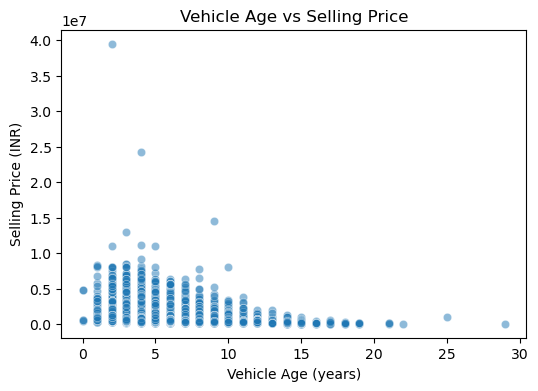

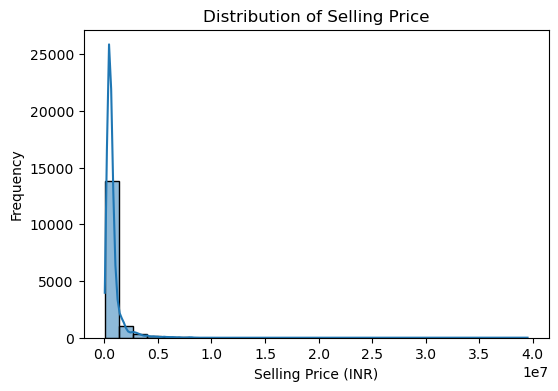

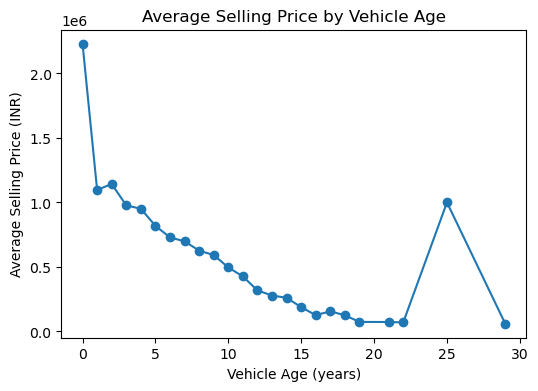

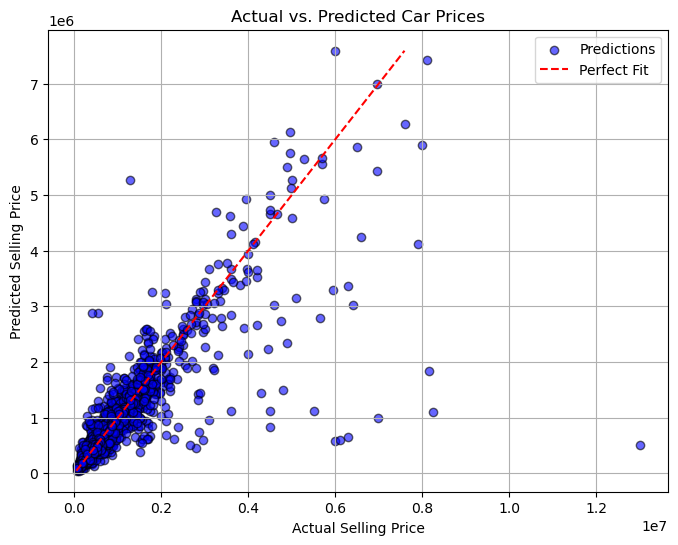

In [9]:
# Q-4: Data Visualization (Scatter Plot, Histogram, Line Graph)
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Vehicle Age vs Selling Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['vehicle_age'], y=df['selling_price'], alpha=0.5)
plt.title("Vehicle Age vs Selling Price")
plt.xlabel("Vehicle Age (years)")
plt.ylabel("Selling Price (INR)")
plt.show()

# Histogram: Selling Price Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (INR)")
plt.ylabel("Frequency")
plt.show()

# Line Graph: Average Price per Vehicle Age
avg_price_per_age = df.groupby("vehicle_age")["selling_price"].mean()
plt.figure(figsize=(6, 4))
avg_price_per_age.plot(marker='o', linestyle='-')
plt.title("Average Selling Price by Vehicle Age")
plt.xlabel("Vehicle Age (years)")
plt.ylabel("Average Selling Price (INR)")
plt.show()

# Actual vs Predicted Prices Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(np.expm1(y_test), y_pred, color='blue', alpha=0.6, edgecolors='k', label="Predictions")
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'r--', label="Perfect Fit")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Car Prices")
plt.legend()
plt.grid()
plt.show()


In [10]:
# Function to adjust price with real-world depreciation trends
def apply_realistic_depreciation(predicted_price, vehicle_age):
    if vehicle_age == 0:
        return predicted_price  # New car, no depreciation
    elif vehicle_age <= 3:
        return predicted_price * (0.75)  # 25% depreciation in 3 years
    elif vehicle_age <= 5:
        return predicted_price * (0.60)  # 40% depreciation in 5 years
    elif vehicle_age <= 10:
        return predicted_price * (0.40)  # 60% depreciation in 10 years
    else:
        return predicted_price * (0.30)  # Older cars retain ~30% value

# Modify prediction function to include depreciation
def predict_car_price(brand_name, model_name, vehicle_age, km_driven):
    # Encode brand & model
    if brand_name in label_encoders['brand'].classes_ and model_name in label_encoders['model'].classes_:
        brand_encoded = label_encoders['brand'].transform([brand_name])[0]
        model_encoded = label_encoders['model'].transform([model_name])[0]
    else:
        return "Error: Invalid brand or model name."

    # Prepare input & scale it
    input_data = np.array([[brand_encoded, model_encoded, vehicle_age, km_driven]])
    input_data = scaler.transform(input_data)

    # Predict log price & convert back
    predicted_log_price = knn.predict(input_data)[0]
    predicted_price = np.expm1(predicted_log_price)

    # Apply improved depreciation formula
    final_price = apply_realistic_depreciation(predicted_price, vehicle_age)

    return f" Estimated Selling Price: ₹{final_price:,.2f}"

print("Updated Prediction Function with Realistic Depreciation!")


Updated Prediction Function with Realistic Depreciation!


In [11]:
# Example test cases
print(predict_car_price("Maruti", "Alto", 5, 50000))
print(predict_car_price("Toyota", "Fortuner", 7, 90000))
print(predict_car_price("Hyundai", "i20", 3, 45000))


 Estimated Selling Price: ₹183,799.89
 Estimated Selling Price: ₹609,051.72
 Estimated Selling Price: ₹576,162.64


C:\Users\namda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\namda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\namda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
import joblib  # Library to save/load models

# Save the trained KNN model
joblib.dump(knn, "knn_car_price_model.pkl")

# Save the StandardScaler used for feature scaling
joblib.dump(scaler, "scaler.pkl")

# Save the LabelEncoders for brand & model
joblib.dump(label_encoders, "label_encoders.pkl")

print("Model, scaler, and encoders saved successfully!")


Model, scaler, and encoders saved successfully!
